# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 13.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
358365,0.0610,0.0024,0.0049,0.0024,0.0024,0.0024,0.0049,0.2344,0.0073,0.2515,4,4,13,13
286124,0.0464,0.2612,0.0024,0.0024,0.0024,0.0244,2.1851,0.2734,0.0024,0.2832,5,5,5,5
361853,0.0635,0.0024,0.0024,0.0024,0.0317,0.5347,0.1807,0.2490,0.0024,0.4736,8,0,13,0
334787,0.0024,0.0024,0.0024,0.0024,0.0024,0.0146,0.0244,0.1221,0.0024,0.2173,6,0,10,0
195943,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0879,0.0928,0.0024,0.2222,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456617 entries, 0 to 456616
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456617 non-null  float64
 1   Emg2          456617 non-null  float64
 2   Emg3          456617 non-null  float64
 3   Emg4          456617 non-null  float64
 4   Emg5          456617 non-null  float64
 5   Emg6          456617 non-null  float64
 6   Emg7          456617 non-null  float64
 7   Emg8          456617 non-null  float64
 8   Emg9          456617 non-null  float64
 9   Emg10         456617 non-null  float64
 10  repetition    456617 non-null  int64  
 11  rerepetition  456617 non-null  int64  
 12  stimulus      456617 non-null  int64  
 13  restimulus    456617 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456617.000000,456617.00000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000,456617.000000
mean,0.087577,0.11154,0.061346,0.020098,0.008846,0.090938,0.618475,0.313635,0.056314,0.273335,3.228675,2.073085,5.721548,3.711012
std,0.175377,0.27810,0.259189,0.122684,0.026813,0.155394,0.947964,0.324967,0.237637,0.115594,3.489333,3.210448,6.595727,6.071876
min,0.000000,0.00000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.065900,0.131800,0.002400,0.212400,0.000000,0.000000,0.000000,0.000000
50%,0.024400,0.00240,0.002400,0.002400,0.002400,0.031700,0.156300,0.200200,0.002400,0.251500,2.000000,0.000000,3.000000,0.000000
75%,0.095200,0.00980,0.004900,0.002400,0.002400,0.122100,0.798300,0.373500,0.002400,0.297900,6.000000,4.000000,10.000000,6.000000
max,4.668000,4.66550,4.663100,4.521500,1.843300,3.176300,4.668000,4.668000,4.665500,3.840300,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188571
8      15509
4      15506
12     15496
7      15495
2      15486
5      15477
11     15468
6      15464
9      15445
10     15440
3      15435
1      15424
13     10332
14     10327
17     10323
15     10294
16     10251
18      5162
19      5162
21      5161
22      5135
23      5128
20      5126
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,0.464456,2.108749,0.000652,-0.164084,-0.271049,-0.574566,-0.681186,0.227761,0.079858,0.091531
1,0.502075,2.084834,-0.024349,-0.164084,-0.271049,-0.574566,-0.681186,0.227761,0.116093,0.050732
2,0.527327,2.316778,-0.057913,-0.164084,-0.271049,-0.574566,-0.681186,0.179581,0.116093,0.030749
3,0.527327,2.332831,-0.107915,-0.164084,-0.271049,-0.574566,-0.681186,0.062652,0.107128,0.050732
4,0.527327,2.372798,-0.141479,-0.146074,-0.271049,-0.574566,-0.681186,-0.047515,0.088824,0.111514
...,...,...,...,...,...,...,...,...,...,...
354550,-0.378621,0.469090,-0.258609,-0.164084,-0.271049,-0.574566,-0.610333,-0.301941,-0.257833,-1.595360
354551,-0.365738,0.549025,-0.258609,-0.164084,-0.271049,-0.574566,-0.603277,-0.363927,-0.257833,-1.575377
354552,-0.315751,0.845180,-0.250047,-0.164084,-0.271049,-0.574566,-0.593804,-0.425632,-0.257833,-1.575377
354553,-0.290500,0.941168,-0.258609,-0.164084,-0.271049,-0.574566,-0.582012,-0.398301,-0.257833,-1.555395


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
70/70 [==============================] - 4s 30ms/step - loss: 1.4450 - accuracy: 0.6254 - val_loss: 1.0502 - val_accuracy: 0.7170
Epoch 2/100
70/70 [==============================] - 2s 25ms/step - loss: 0.9539 - accuracy: 0.7391 - val_loss: 0.8417 - val_accuracy: 0.7709
Epoch 3/100
70/70 [==============================] - 2s 25ms/step - loss: 0.8181 - accuracy: 0.7741 - val_loss: 0.7658 - val_accuracy: 0.7897
Epoch 4/100
70/70 [==============================] - 2s 25ms/step - loss: 0.7452 - accuracy: 0.7923 - val_loss: 0.6977 - val_accuracy: 0.8062
Epoch 5/100
70/70 [==============================] - 2s 25ms/step - loss: 0.6973 - accuracy: 0.8043 - val_loss: 0.6642 - val_accuracy: 0.8161
Epoch 6/100
70/70 [==============================] - 2s 25ms/step - loss: 0.6580 - accuracy: 0.8143 - val_loss: 0.6332 - val_accuracy: 0.8221
Epoch 7/100
70/70 [==============================] - 2s 25ms/step - loss: 0.6307 - accuracy: 0.8207 - val_loss: 0.6016 - val_accuracy: 0.8305
Epoch 

70/70 [==============================] - 2s 26ms/step - loss: 0.2624 - accuracy: 0.9179 - val_loss: 0.3070 - val_accuracy: 0.9066
Epoch 59/100
70/70 [==============================] - 2s 26ms/step - loss: 0.2605 - accuracy: 0.9185 - val_loss: 0.3036 - val_accuracy: 0.9088
Epoch 60/100
70/70 [==============================] - 2s 26ms/step - loss: 0.2589 - accuracy: 0.9190 - val_loss: 0.2989 - val_accuracy: 0.9091
Epoch 61/100
70/70 [==============================] - 2s 26ms/step - loss: 0.2605 - accuracy: 0.9183 - val_loss: 0.3099 - val_accuracy: 0.9081
Epoch 62/100
70/70 [==============================] - 2s 26ms/step - loss: 0.2551 - accuracy: 0.9197 - val_loss: 0.2996 - val_accuracy: 0.9102
Epoch 63/100
70/70 [==============================] - 2s 26ms/step - loss: 0.2536 - accuracy: 0.9203 - val_loss: 0.2952 - val_accuracy: 0.9118
Epoch 64/100
70/70 [==============================] - 2s 26ms/step - loss: 0.2506 - accuracy: 0.9212 - val_loss: 0.2919 - val_accuracy: 0.9121
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

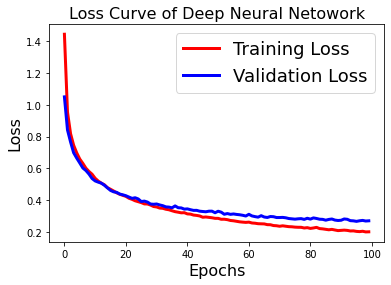

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

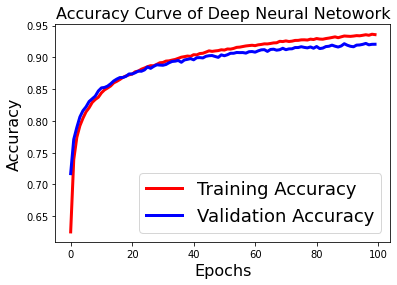

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([15,  0,  9, ...,  4, 12,  1], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 92.05623951150032


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     37418
           1       0.93      0.92      0.93      1916
           2       0.95      0.81      0.88      1886
           3       0.89      0.88      0.89      2108
           4       0.95      0.86      0.91      1874
           5       0.87      0.87      0.87      1961
           6       0.94      0.91      0.92      2156
           7       0.90      0.83      0.86      1759
           8       0.87      0.86      0.87      1869
           9       0.88      0.79      0.84      1913
          10       0.93      0.81      0.87      1640
          11       0.96      0.82      0.89      1823
          12       0.95      0.88      0.91      1741
          13       0.90      0.90      0.90      1065
          14       0.71      0.75      0.73      1401
          15       0.78      0.79      0.79      1412
          16       0.89      0.84      0.87      1256
 

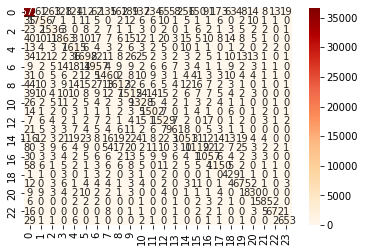

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.677102283143659
MSE: 8.182341244658797
RMSE: 2.8604791984314093


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9207546525079149
Recall Score :  0.9205623951150033
f1_score :  0.9195539833049927
